#  Social Sensing 2

We have just experienced the power of social networks using Python. You have seen how powerful the libraries are and have worked through a complete Twitter analysis. But we have also seen how difficult it is to get the graph visualisations right. Our last network plots can definitely improve. Let's try and do this in this session. In order to dig deeper into the details of (social) network analysis, let’s use a famous example from the past.

Zachary’s karate club is a social network of friendships of 34 members of a karate club at a US university in the 1970s. It is described in W. W. Zachary, An information flow model for conflict and fission in small groups, Journal of Anthropological Research 33, 452-473 (1977). It is a famous early example of successful social network analysis. According to Wikipedia, ‘during the study a conflict arose between the administrator and instructor, which led to the split of the club into two. Half of the members formed a new club around the instructor members from the other part found a new instructor or gave up karate. Based on collected data Zachary assigned correctly all but one member of the club to the groups they actually joined after the split.’ https://en.wikipedia.org/wiki/Zachary%27s_karate_club.

First we load some of the libraries we are always using. Run the cell below.

In [1]:
#Keep cell

import pandas as pd
import numpy as np
import matplotlib as plt

import sca

Now to the main star of this show, which is the networkx library: https://networkx.org/ Load this commonly used network library with `import networkx as nx`.

In [2]:
import networkx as nx 

You have two data frames  in the environment. 

The first is karate_nodes, which contains the nodes of the network with information about the karate club members. Run the cell below.

In [3]:
#Keep cell

karate_nodes = pd.read_csv("data/karate_nodes.csv")
karate_nodes.head()

,id,first_name,last_name,gender,age
0,1,Trang,Philips,F,18
1,2,Lovie,Stanek,F,36
2,3,Gary,James,M,43
3,4,Maximo,Larimer,M,41
4,5,Bruno,Drury,M,18


The second data frame karate_edges contains the edges with information whether one member likes another and by how much. Run the cell below.

In [4]:
#Keep cell

karate_edges = pd.read_csv("data/karate_edges.csv")
karate_edges.head()

,from,to,weight,type
0,1,2,9,likes
1,1,3,5,likes
2,1,4,2,likes
3,1,5,3,likes
4,1,6,12,likes


Now, let’s create a graph with these these edges and nodes. Each graph is just that, a collection of edges and nodes. In our case, we can easily create the graph from the edgelist in karate_edges. The networkx command is:
```
G = nx.from_pandas_edgelist(karate_edges, source = "from", target = "to", create_using=nx.DiGraph(), edge_attr = True)
```

The first argument is the data frame, the second the source node, the third is the target node. We also tell from_pandas_edgelist to create a directed graph with create_using=nx.DiGraph() and to keep all the edge attributes with edge_attr = True.

In [5]:
G = nx.from_pandas_edgelist(karate_edges, source = "from", target = "to", create_using=nx.DiGraph(), edge_attr = True)

Unfortunately, it is not very easy to add all the attributes of the nodes. https://newbedev.com/networkx-setting-node-attributes-from-dataframe explains how this is done by creating first a dictionary of dictionaries from karate_nodes.
Type in: `node_attr = karate_nodes.set_index('id').to_dict('index')`. This will first set the index of karate_nodes to the ids of all nodes. to_dict will then add the row values as another dictionary. Check out how this looks for a row by adding `node_attr[2]`.

In [6]:
node_attr = karate_nodes.set_index('id').to_dict('index')
node_attr[2]

{'first_name': 'Lovie', 'last_name': 'Stanek', 'gender': 'F', 'age': 36}

To set all the node attributes, now run `nx.set_node_attributes(G, node_attr)`.

In [7]:
nx.set_node_attributes(G, node_attr)

With `print(nx.info(G))`, you print out information about the graph. 

In [8]:
print(nx.info(G))

DiGraph with 34 nodes and 78 edges


`G.nodes()` provides a view of nodes.

In [9]:
G.nodes()

NodeView((1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 18, 20, 22, 32, 31, 10, 28, 29, 33, 17, 34, 15, 16, 19, 21, 23, 24, 26, 30, 25, 27))

`G.edges() provides a view of edges.`

In [10]:
G.edges()

OutEdgeView([(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 11), (1, 12), (1, 13), (1, 14), (1, 18), (1, 20), (1, 22), (1, 32), (2, 3), (2, 4), (2, 8), (2, 14), (2, 18), (2, 20), (2, 22), (2, 31), (3, 4), (3, 8), (3, 9), (3, 10), (3, 14), (3, 28), (3, 29), (3, 33), (4, 8), (4, 13), (4, 14), (5, 7), (5, 11), (6, 7), (6, 11), (6, 17), (7, 17), (9, 31), (9, 33), (9, 34), (14, 34), (20, 34), (32, 33), (32, 34), (31, 33), (31, 34), (10, 34), (28, 34), (29, 32), (29, 34), (33, 34), (15, 33), (15, 34), (16, 33), (16, 34), (19, 33), (19, 34), (21, 33), (21, 34), (23, 33), (23, 34), (24, 26), (24, 28), (24, 30), (24, 33), (24, 34), (26, 32), (30, 33), (30, 34), (25, 26), (25, 28), (25, 32), (27, 30), (27, 34)])

Let's check that we added the attributes correctly with `G.nodes.data()`.

In [11]:
G.nodes.data()

NodeDataView({1: {'first_name': 'Trang', 'last_name': 'Philips', 'gender': 'F', 'age': 18}, 2: {'first_name': 'Lovie', 'last_name': 'Stanek', 'gender': 'F', 'age': 36}, 3: {'first_name': 'Gary', 'last_name': 'James', 'gender': 'M', 'age': 43}, 4: {'first_name': 'Maximo', 'last_name': 'Larimer', 'gender': 'M', 'age': 41}, 5: {'first_name': 'Bruno', 'last_name': 'Drury', 'gender': 'M', 'age': 18}, 6: {'first_name': 'Lillian', 'last_name': 'Sowinski', 'gender': 'F', 'age': 22}, 7: {'first_name': 'Candice', 'last_name': 'Gonsalez', 'gender': 'F', 'age': 17}, 8: {'first_name': 'Kathrin', 'last_name': 'Macaluso', 'gender': 'F', 'age': 40}, 9: {'first_name': 'Ivonne', 'last_name': 'Montes', 'gender': 'F', 'age': 20}, 11: {'first_name': 'Nereida', 'last_name': 'Hair', 'gender': 'F', 'age': 18}, 12: {'first_name': 'Angelo', 'last_name': 'Demar', 'gender': 'M', 'age': 20}, 13: {'first_name': 'Alfredo', 'last_name': 'Fenderson', 'gender': 'M', 'age': 21}, 14: {'first_name': 'Clement', 'last_name'

To get the age of node 1, type `G.nodes[1]['age']`.

In [12]:
G.nodes[1]['age']

18

There are a lot of options here and it is good at this moment to check out the documention. To get only edges incident to nodes 1 and 3, type `G.edges([1, 3])`.

In [13]:
G.edges([1, 3])  

OutEdgeDataView([(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 11), (1, 12), (1, 13), (1, 14), (1, 18), (1, 20), (1, 22), (1, 32), (3, 4), (3, 8), (3, 9), (3, 10), (3, 14), (3, 28), (3, 29), (3, 33)])

We can see the node together with its attributes, if we want to now only see the age attribute of each node, we access it using `nx.get_node_attributes(G, 'age').values()`. We need to add values(), get_node_attributes returns a dictionary with the node's id as the key and the age the value. With values(), we only receive the values().

In [14]:
nx.get_node_attributes(G, 'age').values()

dict_values([18, 36, 43, 41, 18, 22, 17, 40, 20, 18, 20, 21, 25, 40, 18, 36, 45, 23, 44, 21, 25, 43, 28, 23, 26, 42, 41, 36, 43, 36, 45, 26, 31, 26])

In [15]:
#BTW, if you don't have a nice dataframe then you can still get the attributes from 
#

nx.get_edge_attributes(G, 'weight').values()


dict_values([9, 5, 2, 3, 12, 10, 10, 16, 12, 10, 9, 10, 18, 17, 5, 19, 6, 18, 4, 11, 18, 2, 19, 15, 15, 10, 3, 15, 15, 14, 10, 8, 14, 16, 9, 16, 5, 9, 10, 7, 10, 10, 19, 10, 2, 18, 18, 17, 6, 15, 19, 4, 1, 14, 12, 16, 3, 17, 16, 10, 8, 8, 12, 11, 13, 17, 14, 4, 12, 17, 4, 19, 15, 7, 13, 15, 9, 16])

It's a dictionary. You would have to cast to a list to get only the ages. Do you know how?

Let's try an plot this graph. It's easy in networkx. Just run nx.draw(G).

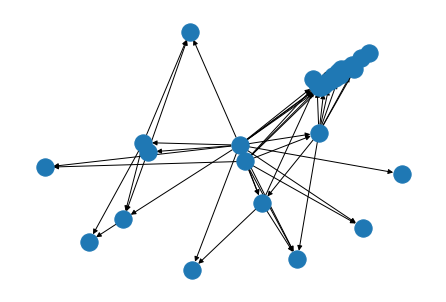

In [16]:
nx.draw(G)

There is a great number of options to improve this graphy. You can, for instance, add the labels, use curved edges  and reduce the arrow size. Try: `nx.draw(G, with_labels=True, connectionstyle="arc3,rad=0.4", arrowsize=0.4)`


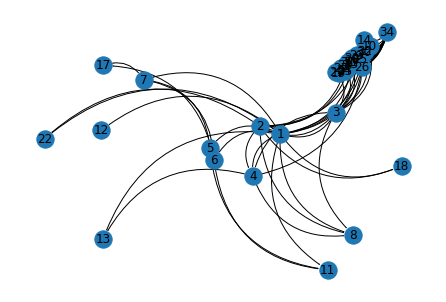

In [17]:
nx.draw(G, with_labels=True, connectionstyle="arc3,rad=0.4", arrowsize=0.4)

The ids are now very exciting as node labels. Let's try and use the first names. 

We could do the same, but then with the actual names, remember how we accessed the ids? Do the same with the names. We can do this with the labels argument for nx.draw. It requires a dictionary mapping node id to the first name. That's easy to get with `node_labels = nx.get_node_attributes(G, 'first_name')`. 

In [18]:
node_labels = nx.get_node_attributes(G, 'first_name')

Now add this to nx.draw: `nx.draw(G, with_labels=True, labels=node_labels, connectionstyle="arc3,rad=0.4", arrowsize=0.4)`.

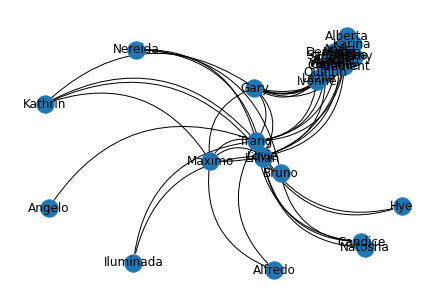

In [19]:
nx.draw(G, with_labels=True, labels=node_labels, connectionstyle="arc3,rad=0.4", arrowsize=0.4)

Let’s say we want to colour our network nodes based on gender as well as size them based on age. We will also change the width of the edges based on their weight. We need to apply a series of changes to the attributes pf our igraph. To get the different colors for different genders we need to add these colors to our dataframe karate_nodes.
 
The Matlib colour names are listed at: https://matplotlib.org/stable/gallery/color/named_colors.html

np.where is one of the many functions of numpy that we will use a lot. It chooses either x or y (second and third argument) depending on the condition in the first argument. Type in:
```
karate_nodes['colour'] = np.where(karate_nodes['gender']== 'F', 'tomato', 'skyblue')
karate_nodes.head()
```

In [20]:
karate_nodes['colour'] = np.where(karate_nodes['gender']== 'F', 'tomato', 'skyblue')
karate_nodes.head()

,id,first_name,last_name,gender,age,colour
0,1,Trang,Philips,F,18,tomato
1,2,Lovie,Stanek,F,36,tomato
2,3,Gary,James,M,43,skyblue
3,4,Maximo,Larimer,M,41,skyblue
4,5,Bruno,Drury,M,18,skyblue


Now draw the graph again with another attribute node_color=np.array(karate_nodes['colour']). Type in: `nx.draw(G, node_color=np.array(karate_nodes['colour']), with_labels=True, labels=node_labels)`.

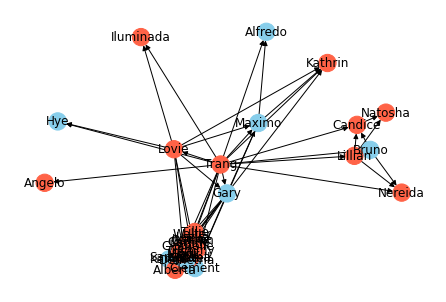

In [21]:
nx.draw(G, node_color=np.array(karate_nodes['colour']), with_labels=True, labels=node_labels) 

We also wanted to change the node size based on age. We could, for example, multiply the age by 10 to get the size that we want. Add `node_size = 10*np.array(karate_nodes['age'])` as an attribute to nx.draw.

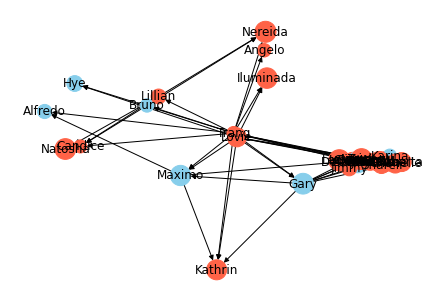

In [22]:
nx.draw(G, node_color=np.array(karate_nodes['colour']), node_size = 10*np.array(karate_nodes['age']),
                         with_labels=True, labels=node_labels) 

The weight of the like-relationship will determine the width of the arrow between two nodes. All we need to do is add another attribute. Type:
```
nx.draw(G, node_color=np.array(karate_nodes['colour']),
        node_size = 10*np.array(karate_nodes['age']),
        with_labels=True, labels=node_labels,
        width= 0.25 * np.array(karate_edges['weight']))
```

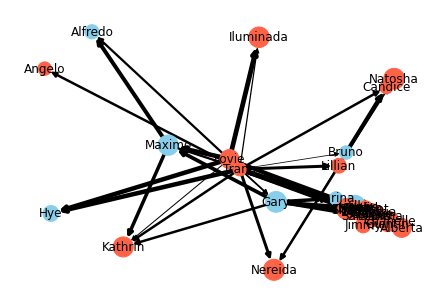

In [23]:
nx.draw(G, node_color=np.array(karate_nodes['colour']),
        node_size = 10*np.array(karate_nodes['age']),
        with_labels=True, labels=node_labels,
        width= 0.25 * np.array(karate_edges['weight']))

Actually, these graphs have never been great. Too many overlaps ...

You can  plot graphs with different layouts to avoid overlaps. To adjust the graph layout, networkx contains layout generators, which try to place the vertices and edges in a way that is more visually appealing. They position ('pos') the nodes and edges on a plane defined by x- and y-values.

There are many layout functions, let's first try a random one. Type:
```
pos = nx.random_layout(G)

nx.draw(G, pos, node_color=np.array(karate_nodes['colour']),
        node_size = 10*np.array(karate_nodes['age']),
        with_labels=True, labels=node_labels,
        width= 0.25 * np.array(karate_edges['weight']))
```

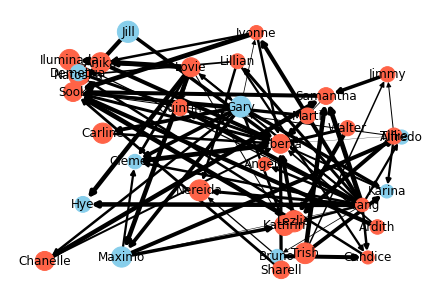

In [24]:
pos = nx.random_layout(G)

nx.draw(G, pos, node_color=np.array(karate_nodes['colour']),
        node_size = 10*np.array(karate_nodes['age']),
        with_labels=True, labels=node_labels,
        width= 0.25 * np.array(karate_edges['weight']))

We can now change the layout parameter and use another function. Fruchterman Reingold (https://en.wikipedia.org/wiki/Force-directed_graph_drawing) is a very popular layout algorithm. It's called spring layout in NetworkX. Change the first line of the last cell into `pos = nx.spring_layout(G)`.

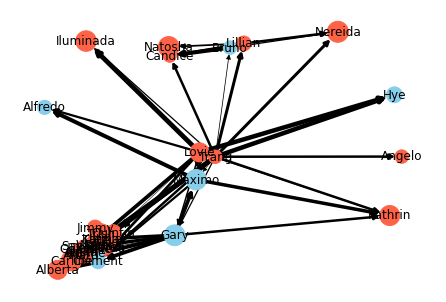

In [25]:
pos = nx.spring_layout(G)

nx.draw(G, pos, node_color=np.array(karate_nodes['colour']),
        node_size = 10*np.array(karate_nodes['age']),
        with_labels=True, labels=node_labels,
        width= 0.25 * np.array(karate_edges['weight']))

This is a bit better. Less overlap. Let's try another layout. Replace the pos line with `pos = nx.kamada_kawai_layout(G)`.

Also, the edges are too dark. A good trick is often to set their colours to greyscale. Also add:
```
nx.draw(G, pos, node_color=np.array(karate_nodes['colour']),
        node_size = 10*np.array(karate_nodes['age']),
        with_labels=True, labels=node_labels,
        edge_color="silver",
        width = 0.25 * np.array(karate_edges['weight']))
```

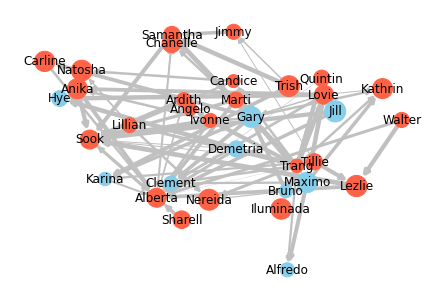

In [26]:
pos = nx.kamada_kawai_layout(G)

nx.draw(G, pos, node_color=np.array(karate_nodes['colour']),
        node_size = 10*np.array(karate_nodes['age']),
        with_labels=True, labels=node_labels,
        edge_color="silver",
        width = 0.25 * np.array(karate_edges['weight']))

Ok. At least everything is readable ... But it is still difficult to see any interesting patterns in the network. Remember, e.g., the original insight from the 1970s paper of the karate club? It described how the larger community of the whole club was effectively the result of several separate communities of members and split thererfore according to trust placed in either the administrator or instructor. Thus the whole karate club community can split up easily. Graph analysis comes with a lot of so-called community detection algorithms that support such investigations. We will use what many consider one of the best algorithms in this domain. Louvain is explained at https://towardsdatascience.com/louvain-algorithm-93fde589f58c. 

Let's first load the library with `from community import community_louvain`. Run the cell below.

In [27]:
#Keep cell

#install with pip install python-louvain
from community import community_louvain

ImportError: cannot import name 'community_louvain' from 'community' (/usr/local/lib/python3.9/site-packages/community/__init__.py)

Louvain requires undirected graphs. We create an undirected copy with `g = G.to_undirected()`.

In [28]:
g = G.to_undirected()

Now let's create the optimal partition of the graph according to Louvain. Run `partition = community_louvain.best_partition(g)`. Print out the items of the dictionary with `partition.items()`.

In [29]:
partition = community_louvain.best_partition(g)
partition.items()

dict_items([(1, 0), (2, 1), (3, 1), (4, 1), (5, 0), (6, 0), (7, 0), (8, 1), (9, 2), (11, 0), (12, 0), (13, 1), (14, 1), (18, 1), (20, 0), (22, 1), (32, 3), (31, 1), (10, 2), (28, 3), (29, 2), (33, 2), (17, 0), (34, 2), (15, 2), (16, 2), (19, 2), (21, 2), (23, 2), (24, 3), (26, 3), (30, 2), (25, 3), (27, 2)])

Louvain create four partitions (0 - 3). Let's plot these partitions by colour-coding the nodes. Run:
```
pos = nx.spring_layout(g)
nx.draw(g, pos, node_color=list(partition.values()), with_labels=True, cmap=plt.cm.Set3)
```
cmap=plt.cm.Set3 is new and chooses a colormap for Python to assign a colour to each partition. Colormaps are very powerful: 
https://www.analyticsvidhya.com/blog/2020/09/colormaps-matplotlib/

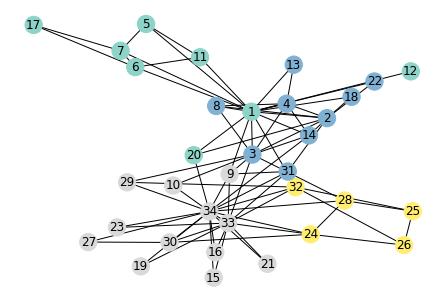

In [30]:
pos = nx.spring_layout(g)
nx.draw(g, pos, node_color=list(partition.values()), with_labels=True, cmap=plt.cm.Set3)

Nice but we can do even better with the help of stackoverflow (https://stackoverflow.com/questions/43541376/how-to-draw-communities-with-networkx). We have added a function `pos = community_layout(g, partition)` that let's you plot partitions by separating them out clearly. Run the cell below.

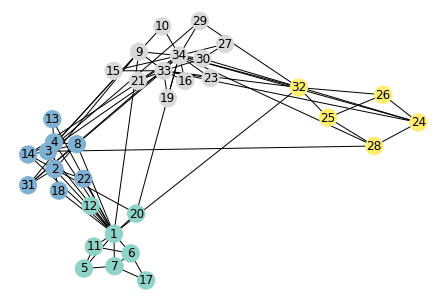

In [31]:
#Keep cell

pos = sca.community_layout(g, partition)

nx.draw(g, pos, node_color=list(partition.values()), with_labels= True, cmap=plt.cm.Set3)

This graph already indicates that some members hold the whole network together by being the main link between the various 4 communities Lourain has detected. Let’s investigate this further and visualise the degree by which members are connected to other members. A graph degree basically counts the number of connections a member has to other members. Let’s overwrite the size of each nodes with the degree. First though we need to calculate the degree for each node. That’s very easy using igraph’s degree function. Simply type graph.degree()

In [32]:
degree_list = [50*g.degree[n] for n in g.nodes()]
degree_list[:5]

[800, 450, 500, 300, 150]

Now, let’s reassign the size of the nodes with setting vertex_size= vertex_size=graph.degree()

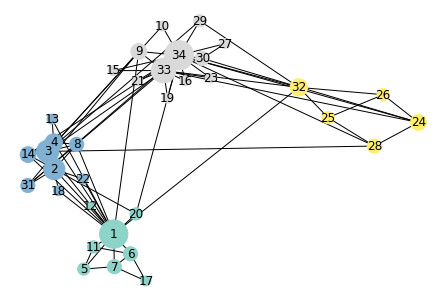

In [33]:
nx.draw(g, pos, node_color=list(partition.values()), node_size=degree_list, with_labels= True, cmap=plt.cm.Set3)

The new graph clearly shows  where the potential breaking points in the network are. Social network analysis is a very powerful tool with a large community already out there. Check it out and happy playing!

That’s it for today. You have learned a lot of things about how to create social sensing networks. This is one of the most important social analytics techniques, and you can impress friends and family now with pretty graphs using the structure of social networks. Next time, we will look into content analysis using text mining.